In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('retail_store_inventory.csv')

In [3]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [4]:
df.shape

(73100, 15)

In [5]:
df.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [6]:
selected_df = df.iloc[:10]  


In [7]:
selected_df = df[df['Region'] == 'North']


In [8]:
selected_df = df[df['Category'] == 'Electronics']

In [9]:
selected_df = df.sample(500, random_state=42)


# Box Plot

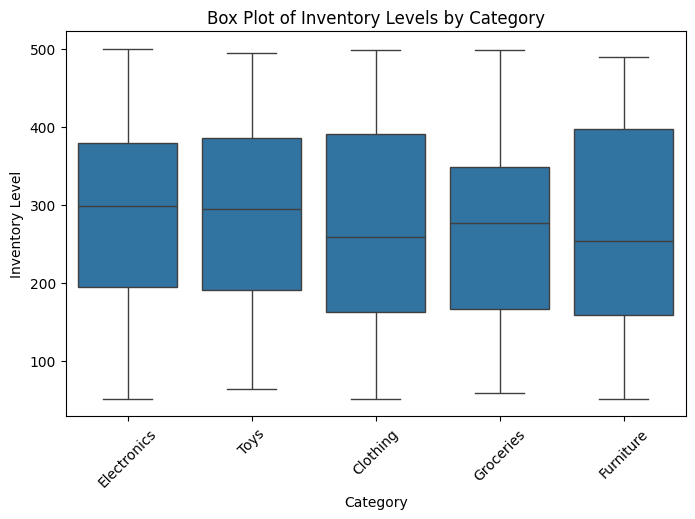

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Inventory Level", data=selected_df)
plt.xticks(rotation=45)
plt.title("Box Plot of Inventory Levels by Category")
plt.show()


# Bar Graph

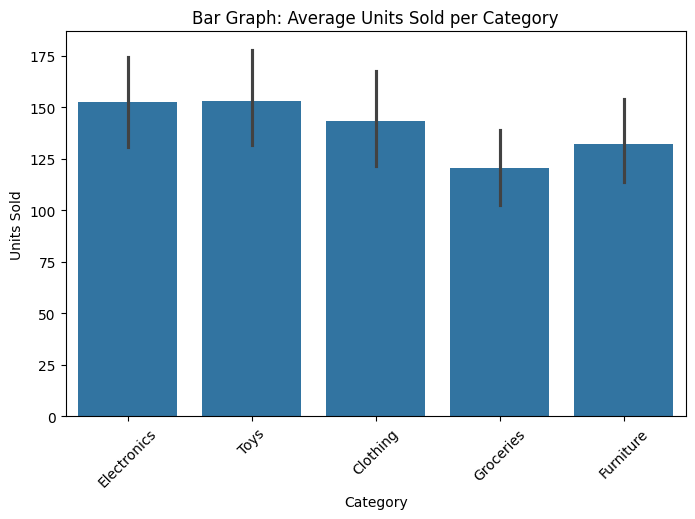

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Units Sold", data=selected_df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Bar Graph: Average Units Sold per Category")
plt.show()


# Scatter Plot

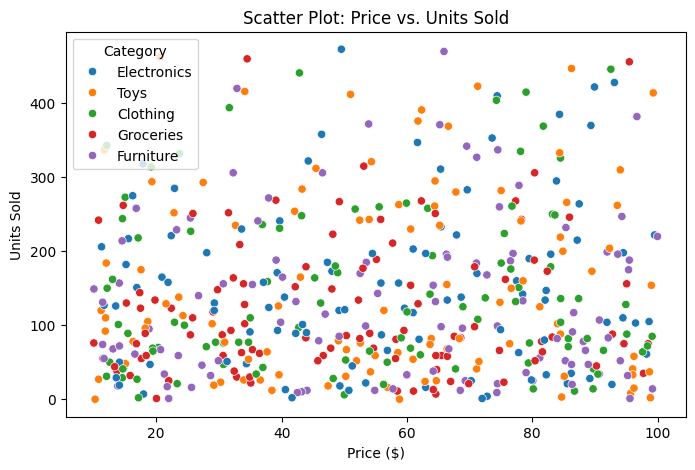

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=selected_df["Price"], y=selected_df["Units Sold"], hue=selected_df["Category"])
plt.title("Scatter Plot: Price vs. Units Sold")
plt.xlabel("Price ($)")
plt.ylabel("Units Sold")
plt.show()


# Heatmap

C:\Users\Parth\AppData\Local\Temp\ipykernel_11056\2270808525.py:1: FutureWarning: The provided callable <function mean at 0x000001E66B24B560> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(values="Units Sold", index="Region", columns="Category", aggfunc=np.mean)


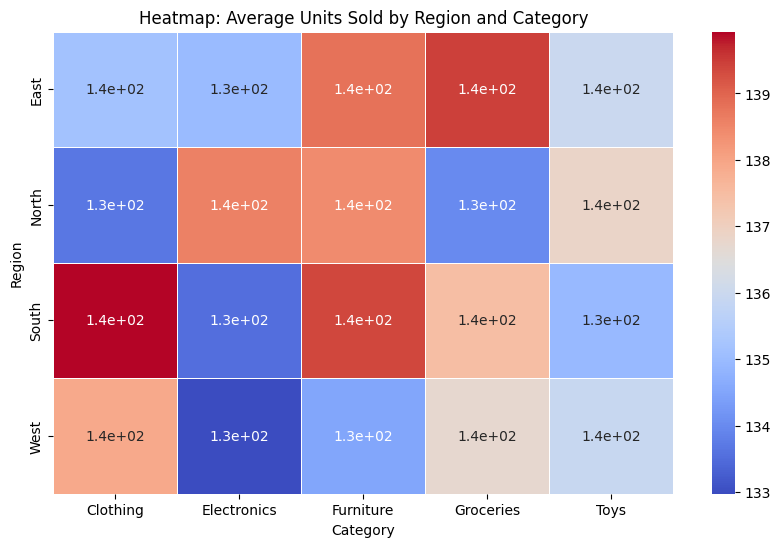

In [15]:
pivot_table = df.pivot_table(values="Units Sold", index="Region", columns="Category", aggfunc=np.mean)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Average Units Sold by Region and Category")
plt.show()

# Histogram

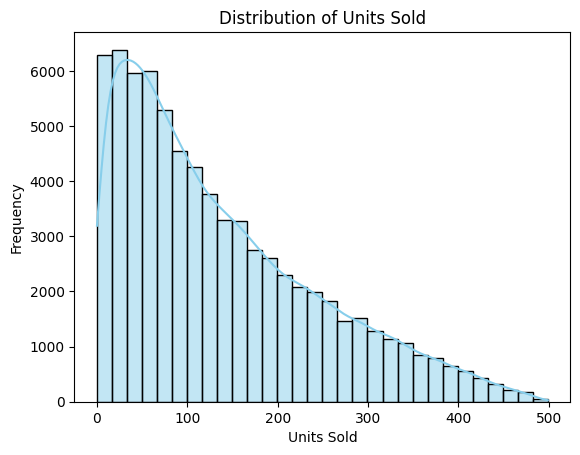

In [16]:
sns.histplot(df["Units Sold"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

# Joint Plot

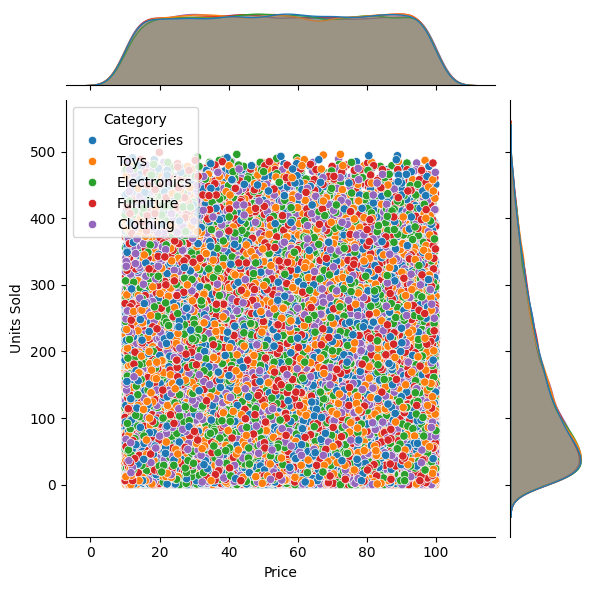

In [17]:
sns.jointplot(data=df, x="Price", y="Units Sold", kind="scatter", hue="Category")
plt.show()

# Pie Chart

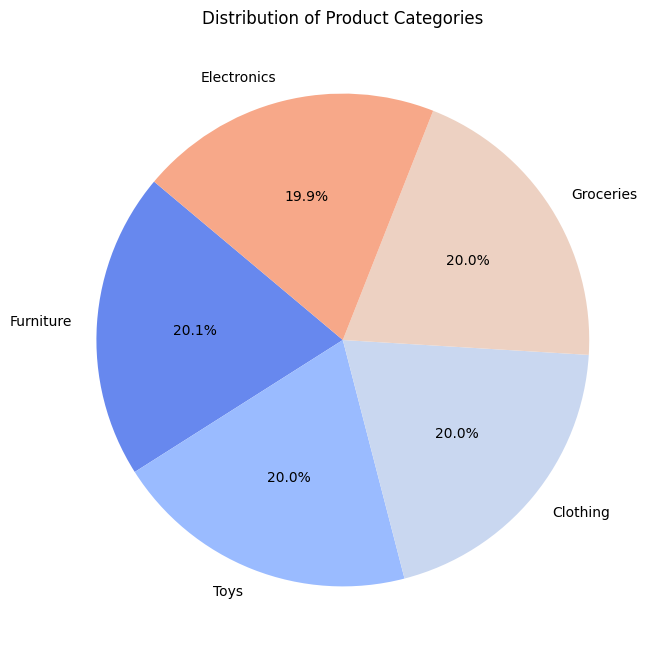

In [21]:
category_counts = df["Category"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Distribution of Product Categories")
plt.show()